# 0.1 Imports

In [2]:
import pandas as pd
import pickle
import random
import seaborn as sns
import warnings

from imblearn.over_sampling import SMOTE
from matplotlib import pyplot as plt
from pandas_profiling import ProfileReport
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import KFold,cross_val_score, RepeatedStratifiedKFold,StratifiedKFold, StratifiedShuffleSplit
from sklearn.naive_bayes import GaussianNB, BernoulliNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, PowerTransformer
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from time import time
from xgboost import XGBClassifier


warnings.filterwarnings("ignore")

# 0.2 Functions

In [36]:
def plot_bivariate_analysis(feature):
    """Creates a dataframe to simulate the probability for all next age ranges
    Args:
        feature: categorical feature to be analysed with the response variable

    Returns:
        fig: Seaborn barplot chart
    """

    df = pd.merge(df_raw[['Diabetes_binary',feature]].groupby(feature).count(),
                               df_raw[['Diabetes_binary',feature]].groupby(feature).sum(),
                               how = 'inner', on = feature)

    df['Diabetes_binary_prob'] = df['Diabetes_binary_y']/df['Diabetes_binary_x']
    
    fig = sns.barplot(df.index, df['Diabetes_binary_prob'])
    
    return fig;

In [4]:
def compare_models (model, X_train, y_train, X_test, y_test, **keyargs):
    """Create sklearn models, train, test and print their performance
    Args:
        model: sklearn model to be tested
        X_train: exploratory variables to be trained 
        y_train: response variable from trained data
        X_test: exploratory variables to be tested
        y_test: response variable from tested data

    """
    
    ml = model.fit(X_train, y_train)
    
    y_lr_pred = ml.predict(X_test)
    score_lr= accuracy_score(y_test,y_lr_pred)*100
    
    print("MODEL PERFORMANCE:")
    print("train accuracy score: ",accuracy_score(y_train,ml.predict(X_train))*100)
    print("test accuracy score: ",score_lr)

    print(f"\n Confusion Matrix : \n {confusion_matrix(y_test,y_lr_pred)} \n")
    print(f"Classiication Report : \n {classification_report(y_test, y_lr_pred)}")
    
    return None

# 0.3 Load data

In [5]:
df_raw = pd.read_csv('./Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

# 1 Data description

## 1.1 Overview

Using pandas_profiling to take a first look to the dataset and take some insights from it

In [6]:
profile = ProfileReport(df_raw, title="Pandas Profiling Report", explorative=True)
profile

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [7]:
df_raw.dtypes

Diabetes_binary         float64
HighBP                  float64
HighChol                float64
CholCheck               float64
BMI                     float64
Smoker                  float64
Stroke                  float64
HeartDiseaseorAttack    float64
PhysActivity            float64
Fruits                  float64
Veggies                 float64
HvyAlcoholConsump       float64
AnyHealthcare           float64
NoDocbcCost             float64
GenHlth                 float64
MentHlth                float64
PhysHlth                float64
DiffWalk                float64
Sex                     float64
Age                     float64
Education               float64
Income                  float64
dtype: object

<b>Some insights: </b>

- Imbalaced response variable
- No missing data
- Strong correlations:
    - GenHlth and Diffwalk
    - Veggies and Fruits
    - Diabetes_012 and HighBP
- Categorical features has few distinct options, they are all on numeric format

Dividing categorical and numeric features to do the proper analysis on them

In [9]:
cat_features = ['HighBP', 'HighChol', 'CholCheck', 'Smoker', 'Stroke', 'HeartDiseaseorAttack', 
 'PhysActivity', 'Fruits', 'Veggies', 'HvyAlcoholConsump', 'Sex', 'DiffWalk',
 'GenHlth', 'NoDocbcCost', 'AnyHealthcare']

num_features = ['BMI', 'MentHlth', 'PhysHlth', 'Age', 'Education', 'Income']

# 2 EDA

### 2.10 Bivariate Analysis

Ploting the rate for diabetes for each categorical variabel value

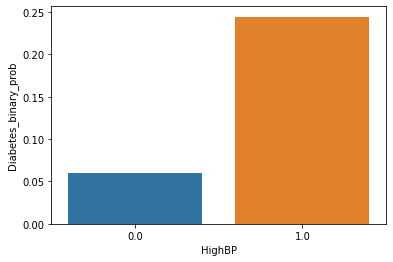

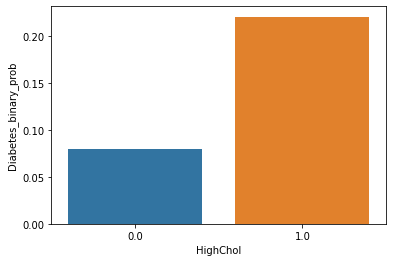

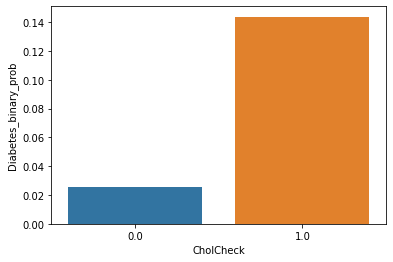

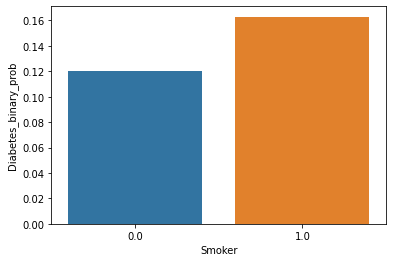

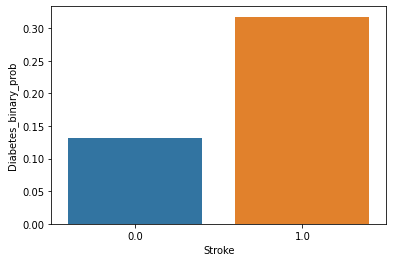

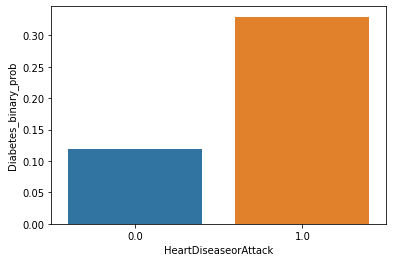

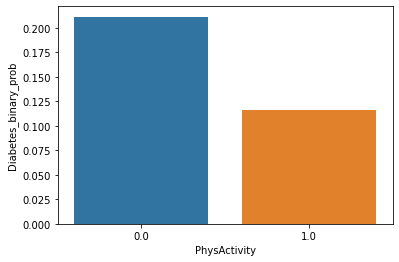

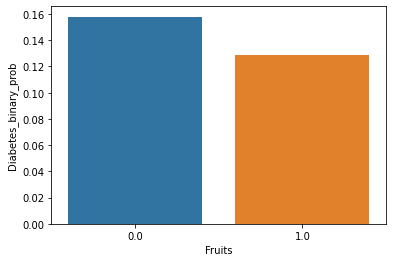

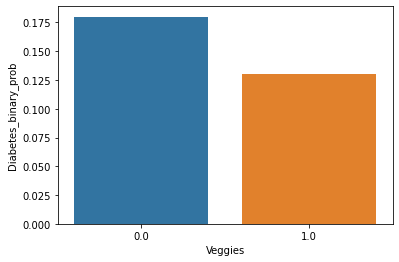

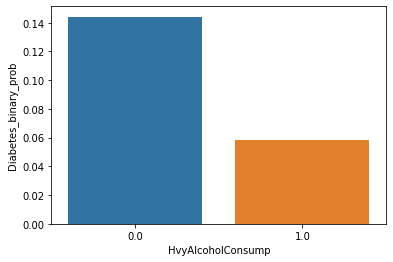

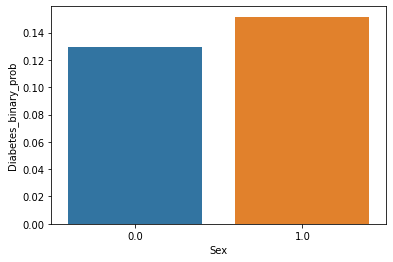

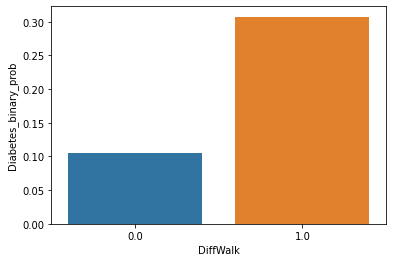

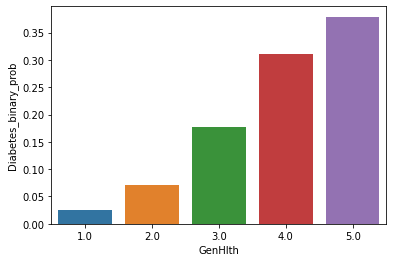

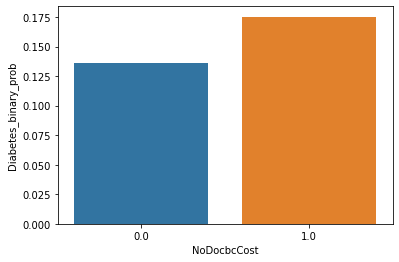

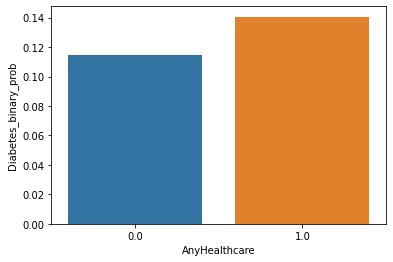

In [22]:
for feature in range(len(cat_features)):
    fig, axs = plt.subplots(ncols=1)
    plot_bivariate_analysis(cat_features[feature])

# 3 Data preparation

## 3.10 train/test split

In [11]:
df2 = df_raw.copy()

Applying stratified shuffle split to avoid imbalanced sampling problem

In [12]:
sss = StratifiedShuffleSplit(n_splits=1, test_size=0.2, random_state=42)
for str_train_set_index, str_test_set_index in sss.split(df2,df2['Diabetes_binary']):
    str_train_set = df2.iloc[str_train_set_index]
    str_test_set = df2.iloc[str_test_set_index]

In [23]:
X_train = str_train_set.drop('Diabetes_binary', axis=1)
y_train = str_train_set['Diabetes_binary']

X_test = str_test_set.drop('Diabetes_binary', axis=1)
y_test = str_test_set['Diabetes_binary']

In [25]:
for model in range(len(evalueted_models)):
    print(evalueted_models[model])
    compare_models(evalueted_models[model], X_train, y_train, X_test, y_test)

LogisticRegression(n_jobs=-1)
MODEL PERFORMANCE:
train accuracy score:  86.25926363923053
test accuracy score:  86.11833806370231

 Confusion Matrix : 
 [[42826   841]
 [ 6202   867]] 

Classiication Report : 
               precision    recall  f1-score   support

         0.0       0.87      0.98      0.92     43667
         1.0       0.51      0.12      0.20      7069

    accuracy                           0.86     50736
   macro avg       0.69      0.55      0.56     50736
weighted avg       0.82      0.86      0.82     50736

KNeighborsClassifier(n_jobs=-1)
MODEL PERFORMANCE:
train accuracy score:  88.56088379060233
test accuracy score:  84.62827183853673

 Confusion Matrix : 
 [[41600  2067]
 [ 5732  1337]] 

Classiication Report : 
               precision    recall  f1-score   support

         0.0       0.88      0.95      0.91     43667
         1.0       0.39      0.19      0.26      7069

    accuracy                           0.85     50736
   macro avg       0.64      0.

/home/magnun/.pyenv/versions/3.8.0/envs/heart01/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


## 3.20 SMOTE

Once we are dealing with a very imbalanced dataset, smote is a good tool to populate it with the minority response variable value.

In [26]:
oversample = SMOTE()
X_train, y_train = oversample.fit_resample(X_train, y_train)

## 3.30 Stardalization

In [37]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

# 4 Machine learning modelling¶

Determining sklearn models to be evaluated

In [28]:
evalueted_models = [
    LogisticRegression(n_jobs=-1), 
    KNeighborsClassifier(n_jobs=-1), 
    GaussianNB(), 
    BernoulliNB(), 
    DecisionTreeClassifier(), 
    RandomForestClassifier(n_jobs=-1), 
    XGBClassifier(n_jobs=-1) 
]

In [29]:
for model in range(len(evalueted_models)):
    print(evalueted_models[model])
    compare_models(evalueted_models[model], X_train, y_train, X_test, y_test)

LogisticRegression(n_jobs=-1)
MODEL PERFORMANCE:
train accuracy score:  75.5812488907464
test accuracy score:  73.26553137811416

 Confusion Matrix : 
 [[31811 11856]
 [ 1708  5361]] 

Classiication Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

KNeighborsClassifier(n_jobs=-1)
MODEL PERFORMANCE:
train accuracy score:  92.04486250980437
test accuracy score:  77.18976663513088

 Confusion Matrix : 
 [[35652  8015]
 [ 3558  3511]] 

Classiication Report : 
               precision    recall  f1-score   support

         0.0       0.91      0.82      0.86     43667
         1.0       0.30      0.50      0.38      7069

    accuracy                           0.77     50736
   macro avg       0.61      0.6

Once this project's goal is to encourage people having a healthier lifestyle to prevent diabetes, it's important choosing a good model on predicting true positives scenarios. We are going to use Logistic Regression once it has a good balance between predicting true positives and test accuracy (and no overfitng sign)

# 5 Fine tuning

## 5.10 Fine tuning

Building a radon fine tuning schema

In [30]:
param = {
    'max_iter': [100, 1500, 1700, 2500, 3000, 3500, 10000],
    'penalty': ['l2', 'l1'],
    'C': [0.05, 0.25, 0.5, 1, 2, 4, 20],
    'multi_class': ['auto', 'ovr']
        }

MAX_EVAL = 25

In [31]:
final_result = pd.DataFrame()


for attempts in range( MAX_EVAL ):
    start = time()
    # choose values for parameters randomly
    hp = { k: random.sample( v, 1 )[0] for k, v in param.items() }

    # model
    fine_model = LogisticRegression(solver = 'liblinear',
                                  max_iter = hp['max_iter'], 
                                  penalty = hp['penalty'], 
                                  C = hp['C'], 
                                  multi_class = hp['multi_class']).fit(X_train, y_train)

    # performance
    y_lr_pred = fine_model.predict(X_test)
    score_lr= accuracy_score(y_test,y_lr_pred)*100
    stop = time()
    
    hp['precision'] = score_lr
    final_result = final_result.append(hp, ignore_index=True)

Listing parameter value and model precision

In [32]:
final_result.sort_values(by=['precision'], ascending=False)

C  max_iter multi_class penalty  precision
0   20.00    1500.0        auto      l2  73.265531
10   0.50     100.0         ovr      l1  73.265531
21   0.05    1500.0        auto      l1  73.265531
20   1.00     100.0        auto      l1  73.265531
18   1.00    3500.0         ovr      l1  73.265531
17   2.00   10000.0        auto      l2  73.265531
16   0.25    1500.0        auto      l1  73.265531
15   0.50     100.0        auto      l1  73.265531
11   0.50    2500.0         ovr      l2  73.265531
12   2.00    2500.0        auto      l2  73.265531
9    2.00    3000.0        auto      l1  73.265531
8    2.00    2500.0        auto      l2  73.265531
7    1.00     100.0        auto      l1  73.265531
5    4.00    3500.0         ovr      l1  73.265531
4    4.00   10000.0         ovr      l2  73.265531
2    2.00   10000.0         ovr      l2  73.265531
24   0.25     100.0        auto      l1  73.265531
1    0.05     100.0        auto      l1  73.263560
13   0.05    2500.0        auto      l2  73.263560
14   0.50    1500.0         ovr      l1  73.263560
6    0.05    3000.0        auto      l1  73.263560
19   0.05    2500.0         ovr      l1  73.263560
3    1.00    2500.0         ovr      l1  73.263560
22  20.00     100.0         ovr      l1  73.263560
23   0.05    1500.0        auto      l1  73.263560

Getting parameters from the best attempt

In [33]:
param_tuned = {
    'max_iter': final_result['max_iter'].head(1),
    'penalty': final_result['penalty'].head(1),
    'C': final_result['C'].head(1),
    'multi_class': final_result['multi_class'].head(1)
        }

## 5.20 Fine tuned model

In [34]:
final_model = LogisticRegression(solver = 'liblinear',
                              max_iter = param_tuned['max_iter'][0], 
                              penalty = param_tuned['penalty'][0], 
                              C = param_tuned['C'][0], 
                              multi_class = param_tuned['multi_class'][0]).fit(X_train, y_train)

## 5.30 Fine tuned performance

In [35]:
y_lr_pred = final_model.predict(X_test)
score_lr= accuracy_score(y_test,y_lr_pred)*100

print("MODEL PERFORMANCE:")
print("train accuracy score: ",accuracy_score(y_train,final_model.predict(X_train))*100)
print("test accuracy score: ",score_lr)

print(f"\n Confusion Matrix : \n {confusion_matrix(y_test,y_lr_pred)} \n")
print(f"Classiication Report : \n {classification_report(y_test, y_lr_pred)}")

MODEL PERFORMANCE:
train accuracy score:  75.58096263175071
test accuracy score:  73.26553137811416

 Confusion Matrix : 
 [[31811 11856]
 [ 1708  5361]] 

Classiication Report : 
               precision    recall  f1-score   support

         0.0       0.95      0.73      0.82     43667
         1.0       0.31      0.76      0.44      7069

    accuracy                           0.73     50736
   macro avg       0.63      0.74      0.63     50736
weighted avg       0.86      0.73      0.77     50736

